# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('F:\\AI Content\\datasets\\House price prediction\\train.csv')

In [7]:
data.drop(['Id'],axis=1,inplace=True)

In [8]:
categorical_features=[i for i in data.columns if data[i].dtype=="O"]
year_features=[i for i in data.columns if 'Yr' in i or 'Year' in i]
numerical_features=[i for i in data.columns if data[i].dtype!='O' and i not in year_features]

# Data Transformation
We will apply Log Normal distribution on skewed data

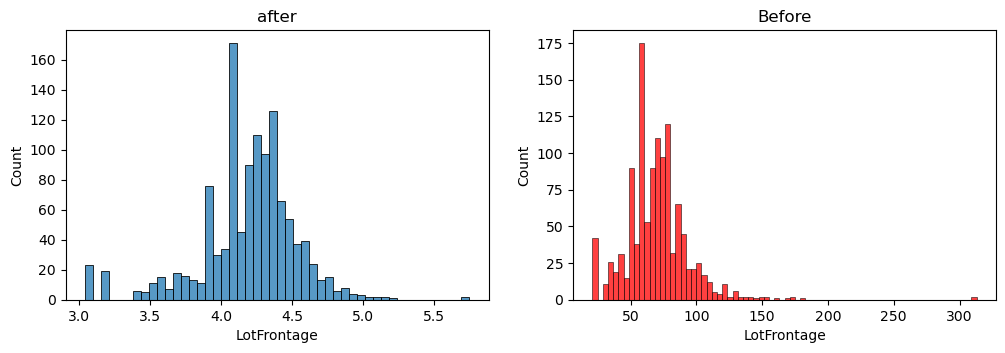

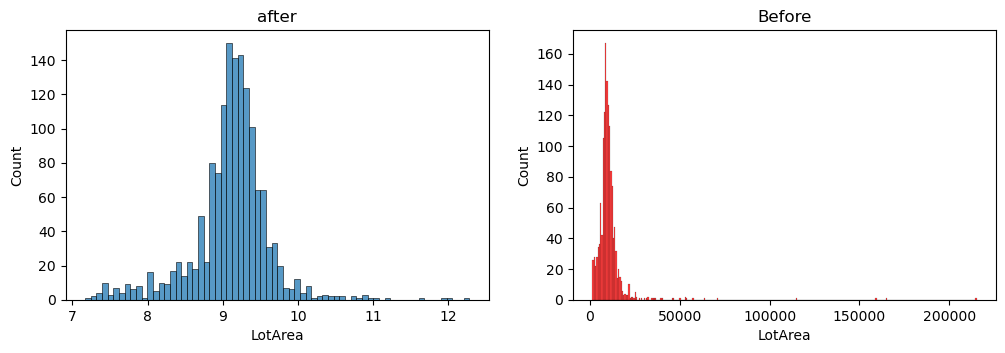

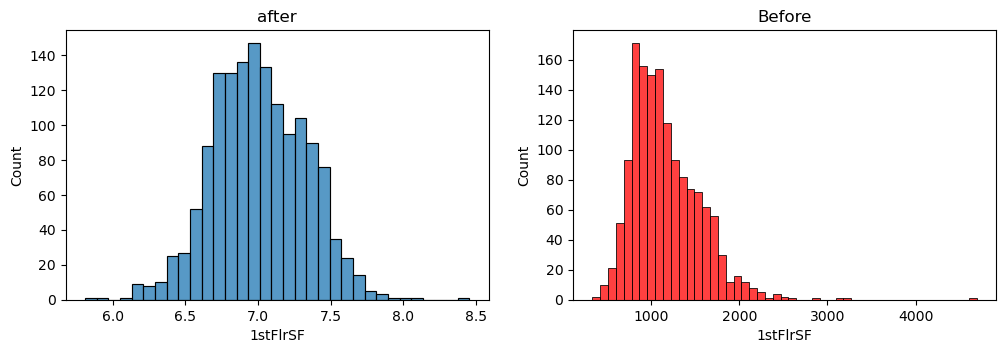

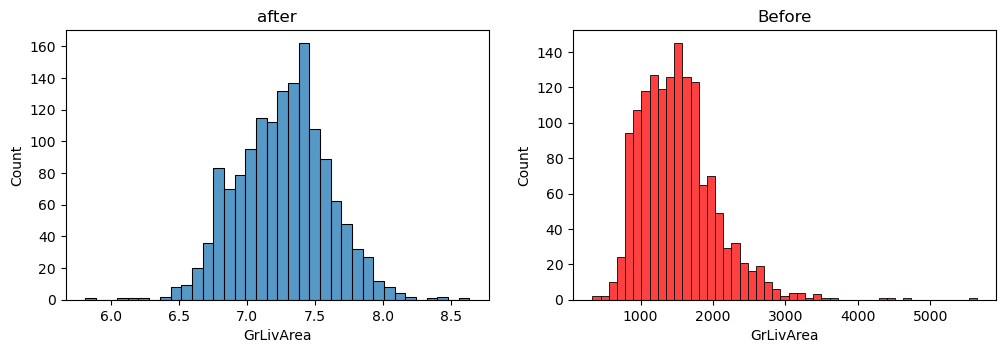

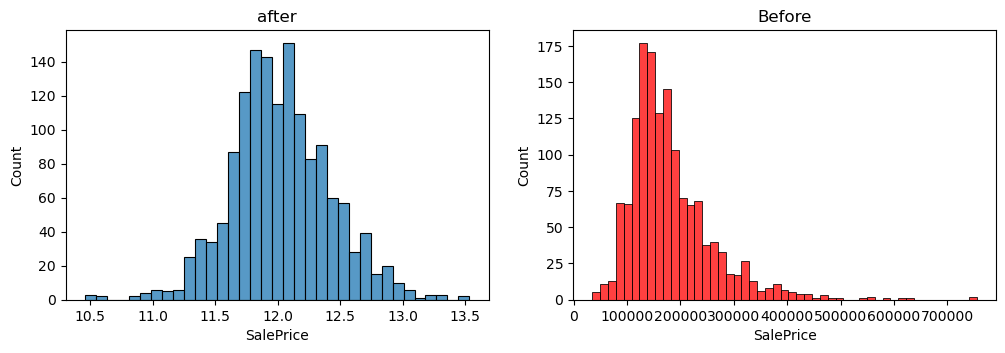

In [9]:
con_num=[i for i in numerical_features if len(data[i].unique())>=25]
copy=data.copy()
for i in con_num:
    if 0 in copy[i].unique():
        pass
    else:
        copy[i]=np.log(copy[i])
        try:
            plt.figure(figsize=(12,3.5))
            plt.subplot(1,2,1)
            plt.title("after")
            sns.histplot(copy[i])
            plt.subplot(1,2,2)
            plt.title('Before')
            sns.histplot(data[i],color='red')
            plt.show()
        except:
            pass

# Feature Engineering

## Handling High Cardinality Features

In [10]:
copy2=copy.copy()
for i in [i for i in copy2.columns if copy2[i].dtype=="O"]:
    if len(copy2[i].unique())>10:
        trim=copy2[i].value_counts()[8:-1].index
        copy2[i]=np.where(copy2[i].isin(trim),'Other',copy2[i])

In [11]:
for i in [i for i in copy2.columns if copy2[i].dtype=="O"]:
    if len(copy[i].unique())>10:
        print(copy2[i].unique())

['CollgCr' 'Other' 'Somerst' 'OldTown' 'Sawyer' 'NridgHt' 'NAmes'
 'Edwards' 'Gilbert' 'Blueste']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Other' 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'Other' 'Stucco' 'CBlock']


### Creating New Feature

In [12]:
for i in year_features:
    if 'YrSold'== i:
        pass
    else:
        copy2[i]=copy2['YrSold']-copy2[i]

In [13]:
final_data=copy2.sample(len(copy2))

In [14]:
final_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
538,20,RL,NaN,9.354700,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,11.970350
1437,20,RL,4.564348,9.428994,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,12.885671
971,160,RL,3.583519,7.726654,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,12.061047
1376,30,RL,3.951244,8.747034,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,11.418615
812,20,C (all),4.189655,9.072457,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,10.932982


### Import Neccessaries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### Feature Selection

In [27]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(final_data.drop(['SalePrice'],axis=1),final_data['SalePrice'],test_size=0.2,random_state=42)

In [28]:
for i in [i for i in Xtrain.columns if Xtrain[i].dtype=="O"]:
    Xtrain[i]=encoder.fit_transform(Xtrain[i])
for i in [i for i in Xtrain.columns if Xtrain[i].dtype=="O"]:    
    Xtest[i]=encoder.transform(Xtest[i])

In [124]:
features=SelectFromModel(Lasso(alpha=0.025,random_state=0))
features.fit(Xtrain,Ytrain)

SelectFromModel(estimator=Lasso(alpha=0.025, random_state=0))

In [125]:
selected_features=Xtrain.columns[(features.get_support())]

In [126]:
selected_features

Index(['MSSubClass', 'LotShape', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SaleCondition'],
      dtype='object')